In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns',999)

In [8]:
df = pd.read_excel('online_retail_II.xlsx',sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [10]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [12]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
df[df['Invoice'].str.match('^\\d{6}$') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [17]:
df[(df['Invoice'].str.match('^\\d{6}$') == False) & (df['Invoice'].str.match('^C\\d{6}$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [19]:
df[df['StockCode'].str.match('^\\d{6}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [22]:
df[df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [24]:
df[(df['StockCode'].str.match('^\\d{5}+$')==False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [25]:
df['Customer ID'].isnull().sum()

107927

In [26]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

# Data Cleaning

In [27]:
cleaned_df = df.copy()

In [28]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [42]:
# cleaned_df['Invoice'] = cleaned_df['Invoice'].astype(str)
cleaned_df = cleaned_df[cleaned_df['Invoice'].str.match("^\\d{6}") == True]

In [44]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [45]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype(str)

C:\Users\kirtan tripathi\AppData\Local\Temp\ipykernel_14568\801722888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['StockCode'] = cleaned_df['StockCode'].astype(str)


In [47]:
cleaned_df = cleaned_df[(cleaned_df['StockCode'].str.match('^\\d{5}$') == True ) | (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True ) | (cleaned_df['StockCode'].str.match('PADS') == True )]

In [49]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

In [54]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,406309.000000,406309.000000,406309.000000
mean,13.617924,2.991668,15373.722268
std,96.998833,4.285951,1677.329470
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14006.000000
50%,5.000000,1.950000,15326.000000
75%,12.000000,3.750000,16814.000000
max,19152.000000,295.000000,18287.000000


In [53]:
cleaned_df = cleaned_df[cleaned_df['Price']>0]

# feature extraction

In [57]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [60]:
aggregated_df = cleaned_df.groupby(by=['Customer ID'],as_index=False).agg(totalSales=('SalesLineTotal','sum'),Frequency=('Invoice','nunique'),lastInvoiceDate=('InvoiceDate','max'))

In [62]:
aggregated_df.head()

,Customer ID,totalSales,Frequency,lastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [64]:
last_date = max(aggregated_df['lastInvoiceDate'])

In [65]:
aggregated_df['Recency'] = (last_date - aggregated_df['lastInvoiceDate']).dt.days

In [70]:
aggregated_df.head()

,Customer ID,Frequency,lastInvoiceDate,Recency,MonetaryValue
0,12346.0,2,2010-06-28 13:53:00,164,169.36
1,12347.0,2,2010-12-07 14:57:00,2,1323.32
2,12348.0,1,2010-09-27 14:59:00,73,221.16
3,12349.0,2,2010-10-28 08:23:00,42,2221.14
4,12351.0,1,2010-11-29 15:23:00,10,300.93


In [67]:
aggregated_df['MonetaryValue'] = aggregated_df['totalSales']

In [69]:
aggregated_df.drop(columns=['totalSales'],inplace=True)

(array([1814.,  876.,  382.,  234.,  221.,  184.,  208.,  145.,  104.,
         117.]),
 array([  0. ,  37.3,  74.6, 111.9, 149.2, 186.5, 223.8, 261.1, 298.4,
        335.7, 373. ]),
 <BarContainer object of 10 artists>)

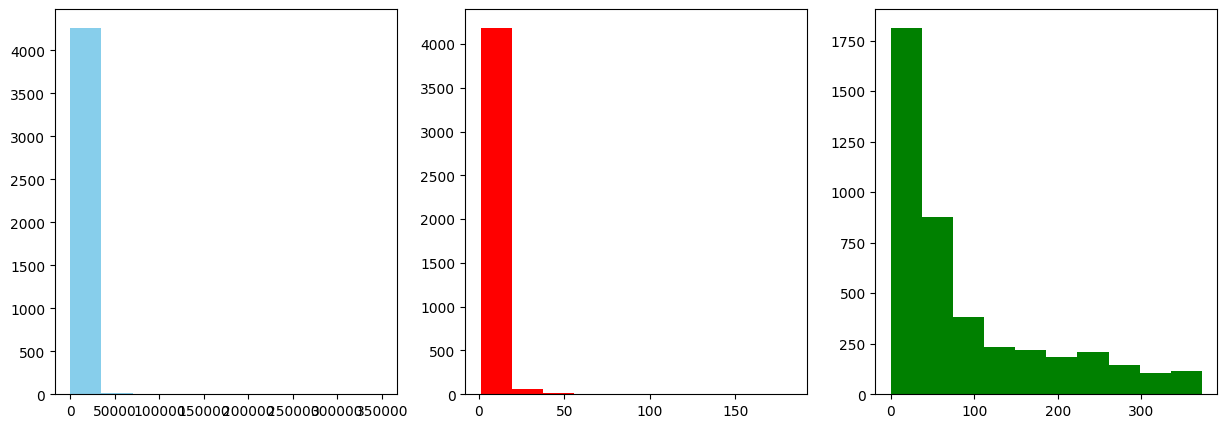

In [74]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'],color='skyblue')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],color='red')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x2343a948790>,
 'caps': [<matplotlib.lines.Line2D at 0x234397b9650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2343a8af590>],
 'medians': [<matplotlib.lines.Line2D at 0x234397bac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x234397bb6d0>],
 'means': []}

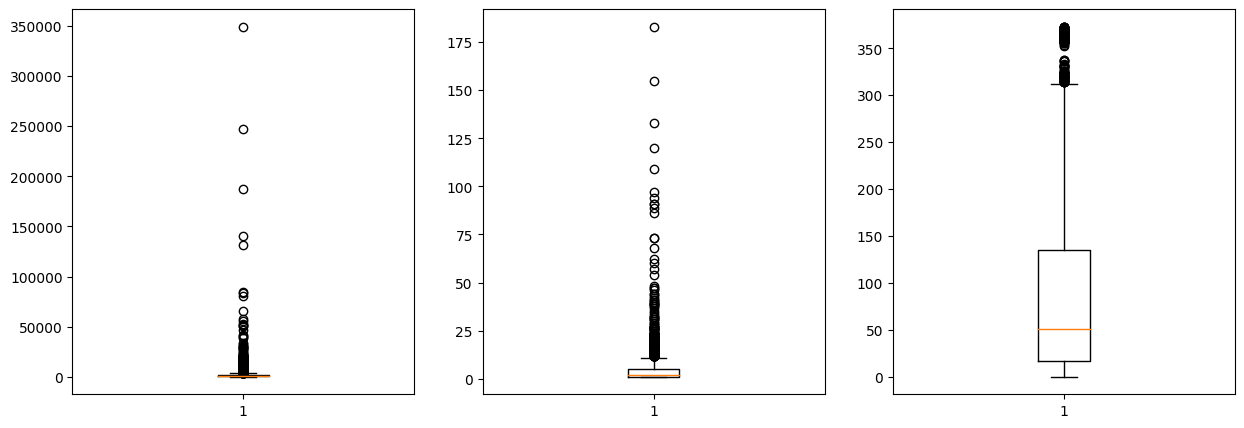

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(aggregated_df['MonetaryValue'])

plt.subplot(1,3,2)
plt.boxplot(aggregated_df['Frequency'])

plt.subplot(1,3,3)
plt.boxplot(aggregated_df['Recency'])

In [82]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outlier_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5*M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5*M_IQR))]

In [83]:
monetary_outlier_df.describe()

,Customer ID,Frequency,Recency,MonetaryValue
count,423.000000,423.000000,423.000000,423.000000
mean,15103.040189,17.167849,30.035461,12188.101740
std,1728.661406,19.729755,51.541004,25830.851045
min,12357.000000,1.000000,0.000000,3802.040000
25%,13622.000000,8.000000,3.000000,4605.940000
50%,14961.000000,12.000000,13.000000,6191.320000
75%,16692.000000,18.000000,31.000000,10273.235000
max,18260.000000,183.000000,364.000000,349164.350000


In [88]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outlier_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5*F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5*F_IQR))]

In [89]:
frequency_outlier_df.describe()

,Customer ID,Frequency,Recency,MonetaryValue
count,279.000000,279.000000,279.000000,279.000000
mean,15352.655914,23.810036,16.089606,14409.714932
std,1748.429987,21.932937,26.589117,31381.736785
min,12437.000000,12.000000,0.000000,1094.390000
25%,13800.000000,13.000000,2.000000,4331.560500
50%,15465.000000,17.000000,7.000000,6615.770000
75%,16828.500000,23.000000,19.000000,11692.405000
max,18260.000000,183.000000,211.000000,349164.350000


In [98]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(monetary_outlier_df.index)) & (~aggregated_df.index.isin(frequency_outlier_df.index))]

{'whiskers': [<matplotlib.lines.Line2D at 0x2343934ced0>,
 'caps': [<matplotlib.lines.Line2D at 0x234394061d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2343934e8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23439405d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2343a965350>],
 'means': []}

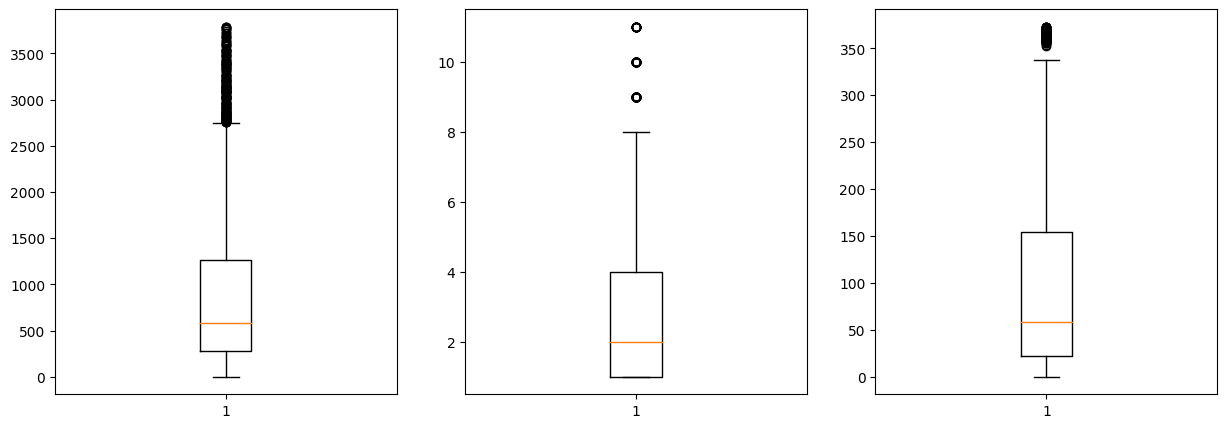

In [99]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(non_outlier_df['MonetaryValue'])

plt.subplot(1,3,2)
plt.boxplot(non_outlier_df['Frequency'])

plt.subplot(1,3,3)
plt.boxplot(non_outlier_df['Recency'])

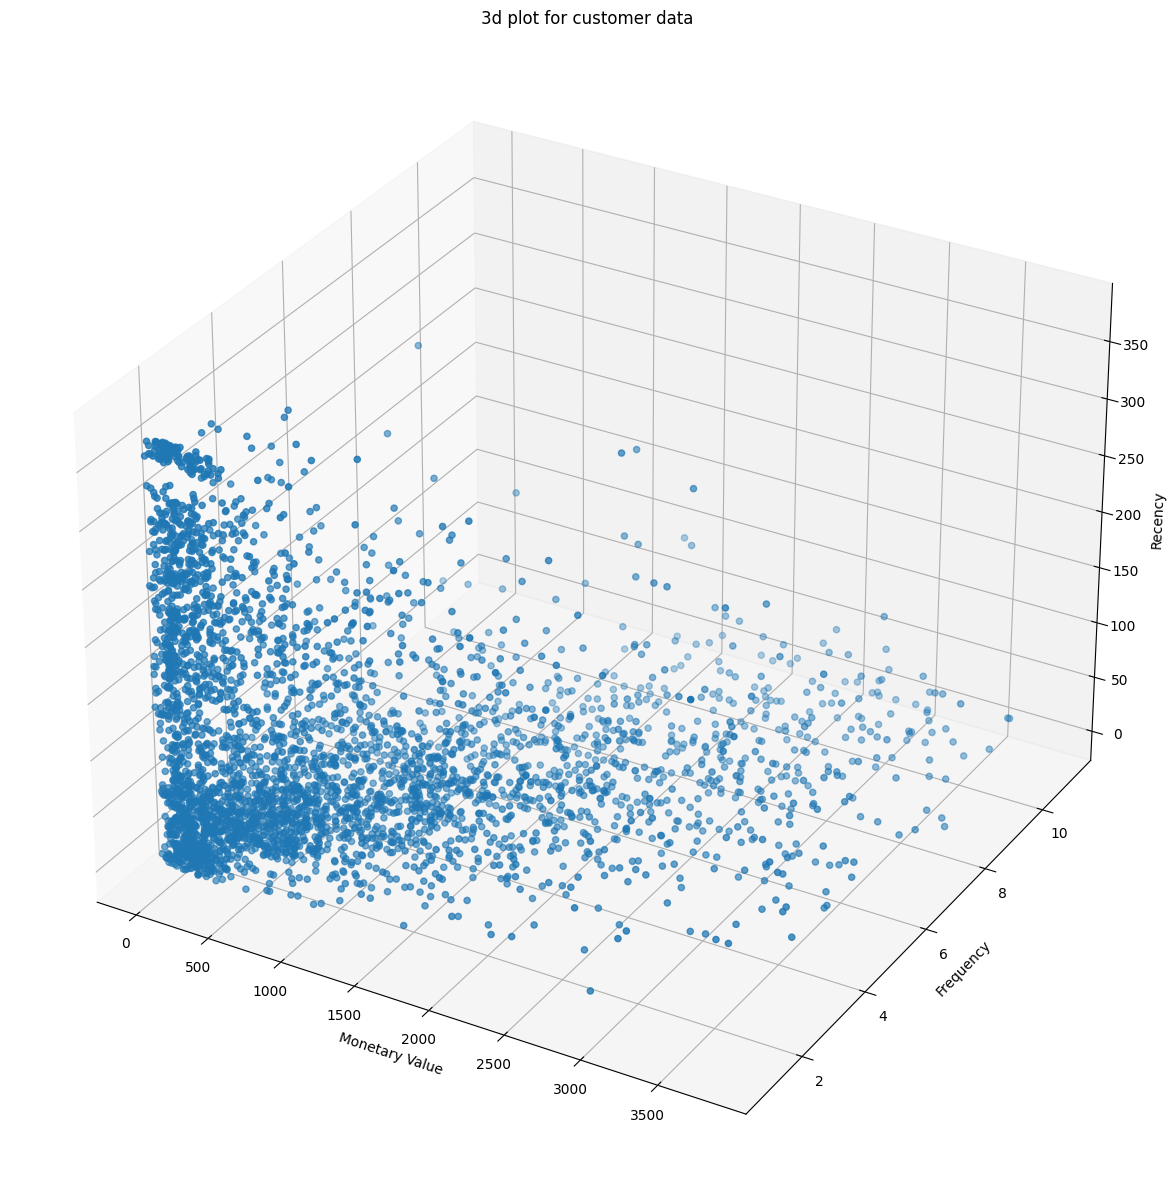

In [101]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outlier_df["MonetaryValue"],non_outlier_df["Frequency"],non_outlier_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3d plot for customer data')

plt.show()

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_oulier_df[['MonetaryValue','Frequency','Recency']])
scaled_data_df = pd.DataFrame(scaled_data,index = non_outlier_df.index,columns=['MonetaryValue','Frequency','Recency'])
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


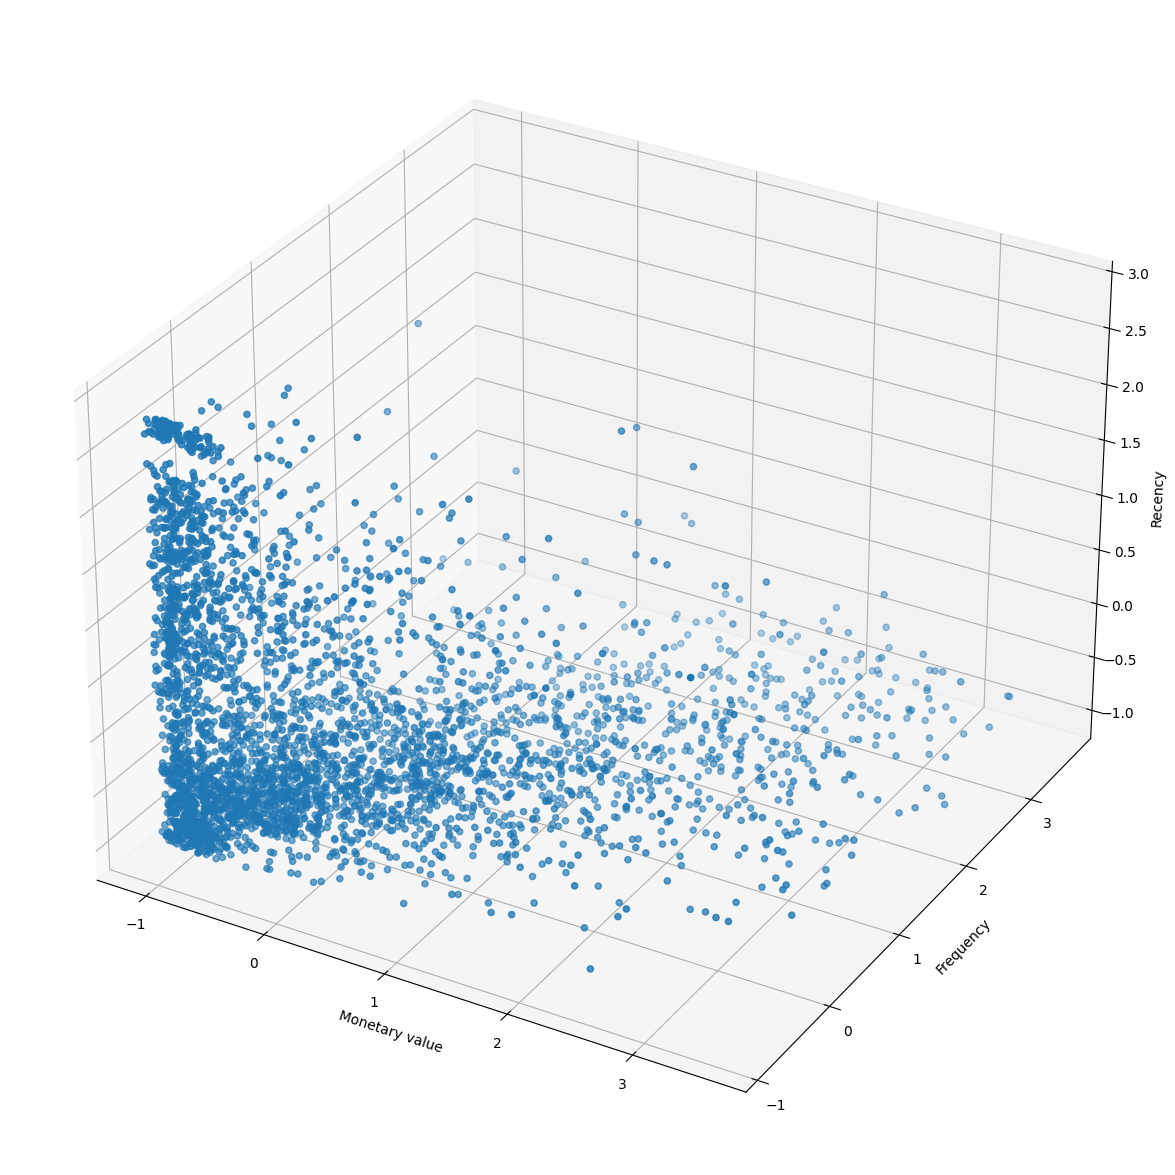

In [105]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df["MonetaryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"])

ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.show()

# KMeans Clustering

In [106]:
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


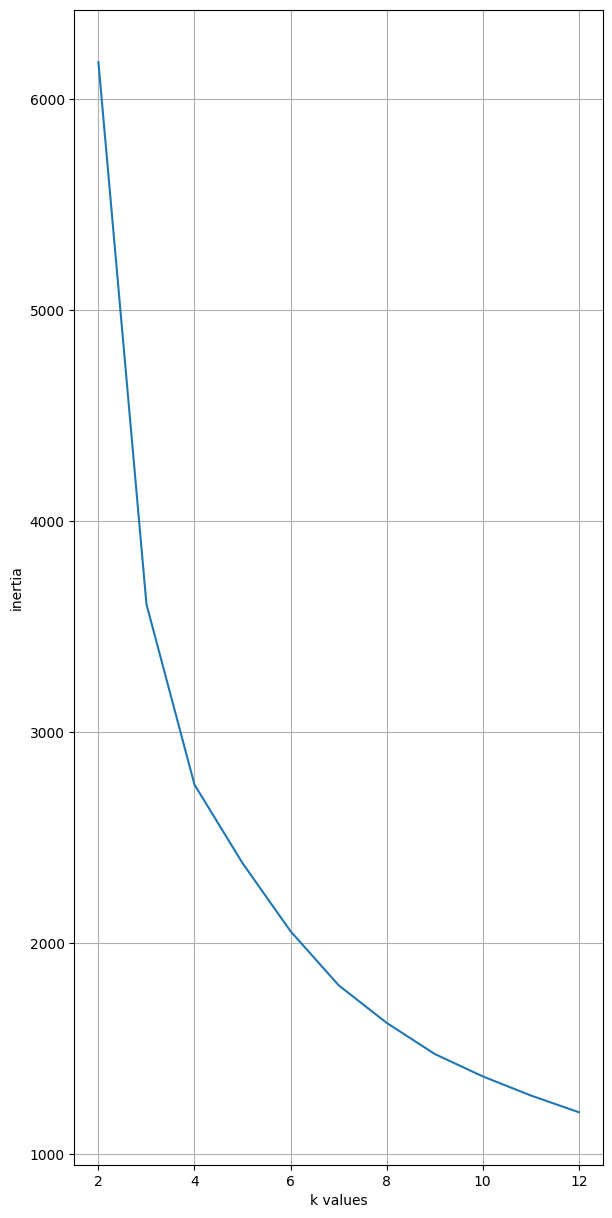

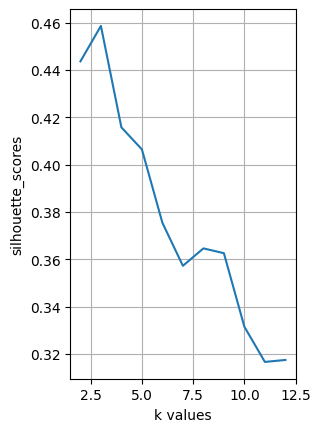

In [116]:
inertia = []
silhouette_scores = []
k_values = range(2,13)

for k in k_values:
    kmeans = KMeans(n_clusters=k,max_iter=1000,random_state=42,n_init=10)
    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.plot(k_values,inertia)
plt.ylabel('inertia')
plt.xlabel('k values')
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores)
plt.ylabel('silhouette_scores')
plt.xlabel('k values')
plt.grid(True)
plt.show()

In [132]:
kmeans = KMeans(n_clusters=4,max_iter=1000,random_state=42,n_init=10)

In [133]:
cluster_labels = kmeans.fit_predict(scaled_data_df)
len(cluster_labels)

3809

In [134]:
scaled_data_df.shape

(3809, 3)

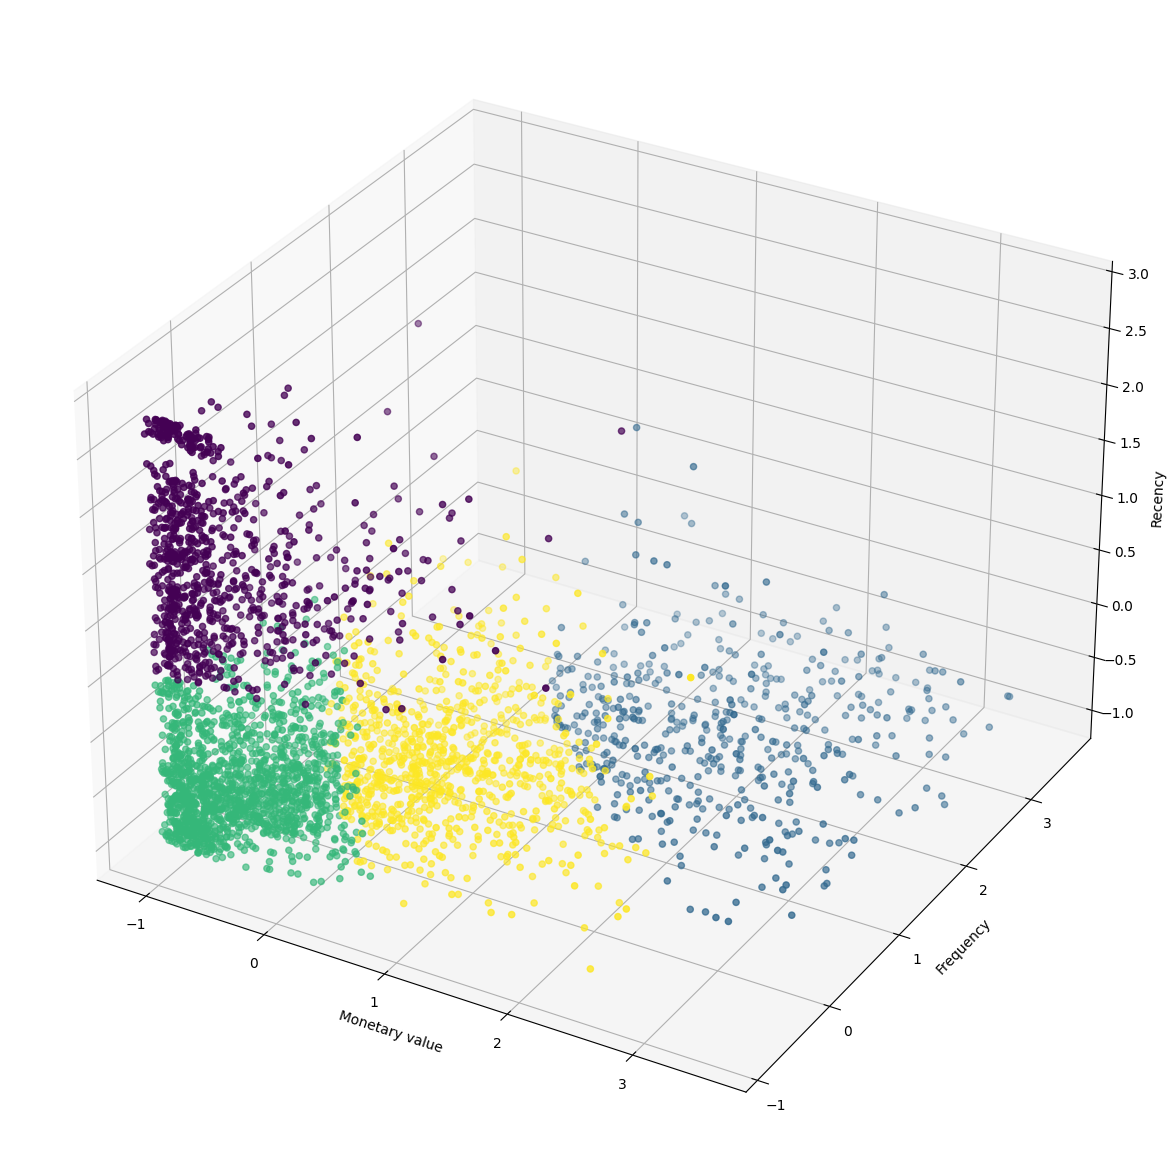

In [135]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df["MonetaryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"],c=cluster_labels)

ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

plt.show()

In [136]:
non_outlier_df['cluster'] = cluster_labels
non_outlier_df.head()

C:\Users\kirtan tripathi\AppData\Local\Temp\ipykernel_14568\3109672663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['cluster'] = cluster_labels


,Customer ID,Frequency,lastInvoiceDate,Recency,MonetaryValue,cluster
0,12346.0,2,2010-06-28 13:53:00,164,169.36,0
1,12347.0,2,2010-12-07 14:57:00,2,1323.32,3
2,12348.0,1,2010-09-27 14:59:00,73,221.16,2
3,12349.0,2,2010-10-28 08:23:00,42,2221.14,3
4,12351.0,1,2010-11-29 15:23:00,10,300.93,2
